# Characteristics

* Core material: NiZn
* High Curie temperature: <200 ºC
* Operating temperature: –25 ºC to +125 ºC
* Material : 3 W 180

# 1-turn check
At 500kHz : 
* L = 787nH
* Z = 40.3m + 2.42j Ω

So Al = 787 nH/N².  Actual 2:14 trafo measurements bring this down to 649nH/N².

In [1]:
from calcInductors import calc_inductor_turns

Al = 787  # [nH/N²]
L = 1.33e-5 # [H] Minimum inductance for a 5x50ohm impedance at 3MHz
turns_ratio = 7

[Np, Ns] = calc_inductor_turns(Al, L, turns_ratio)
print("Required number of turns on primary winding: " + str(Np))
print("Required number of turns on secondary winding: " + str(Ns))


Required number of turns on primary winding: 5
Required number of turns on secondary winding: 35


Experience with the [SIFERRIT binocular core](./SIFERRIT_K1.ipynb) learned me that 2:14 is about the maximum number of wire we can fit.
* Cut 60cm for secondary coil
* Cut 12cm for primary coil

# Measure coil parameters

SRF = 6.46MHz (visual reading on smith chart)

In [4]:
import skrf as rf
from calcInductors import calcSRF, transformer_bandwidth_calculation

f = 489.575e3 # [kHz]
Z_open = 216e-3 + 9.77j # [Ω]
Z_shorted = 158e-3 + 1.79j # [Ω]

filepath = 'measurements/WE_7427056/2p14s_SecondaryOpen.s1p'

nw = rf.Network(filepath)

srf = calcSRF(nw)
print('SRF = {:.4}Hz and the resistance is {:.4}Ω'.format(srf[1], srf[0]))

transformer_bandwidth_calculation(f, srf[1], 2, 50, Z_open, Z_shorted)

SRF = 6.468e+06Hz and the resistance is 2.368e+03Ω
Leakage inductance = 5.82e-07H
Magnetization inductance = 2.59e-06H
Al = 6.49e+02 nH/N²
Cw = 2.33e-10 F
Low frequency cut-off (fl) = 3.07e+06Hz
High frequency cut-off due to winding capacitance = 1.36e+07Hz
High frequency cut-off due to resonance of winding capacitance and leakage inductance = 1.37e+07Hz


/home/christoph/.local/lib/python3.10/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)


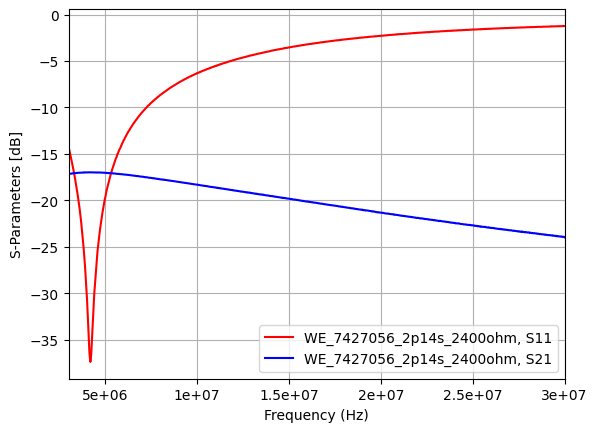

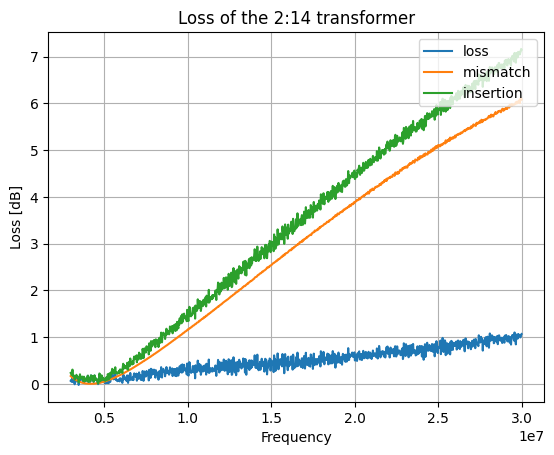

In [5]:
# Measure loss

from plotResults import plot_s_parameters, plot_transformer_loss

nw = rf.Network('./measurements/WE_7427056/WE_7427056_2p14s_2400ohm.s2p')
nw_cal = rf.Network('./measurements/WE_7427056/2400ohm_cal.s2p')
plot_s_parameters(nw)
loss_db = plot_transformer_loss(nw, nw_cal, 'Loss of the 2:14 transformer')